---
## 1.Load libraries and dataset
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import r2_score,mean_squared_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import keras
from keras.models import Model
from keras.layers import *
from keras import optimizers

data=pd.read_csv("data.csv",header=None)

Using TensorFlow backend.


---
## 2.Summarize data
---

In [2]:
data.shape

(208, 61)

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
data.tail()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M
207,0.0260,0.0363,0.0136,0.0272,0.0214,0.0338,0.0655,0.1400,0.1843,0.2354,...,0.0146,0.0129,0.0047,0.0039,0.0061,0.0040,0.0036,0.0061,0.0115,M


In [5]:
data.iloc[:,-1].unique()

array(['R', 'M'], dtype=object)

We can see this is a binary classification problem, and the classes are M and R.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
0     208 non-null float64
1     208 non-null float64
2     208 non-null float64
3     208 non-null float64
4     208 non-null float64
5     208 non-null float64
6     208 non-null float64
7     208 non-null float64
8     208 non-null float64
9     208 non-null float64
10    208 non-null float64
11    208 non-null float64
12    208 non-null float64
13    208 non-null float64
14    208 non-null float64
15    208 non-null float64
16    208 non-null float64
17    208 non-null float64
18    208 non-null float64
19    208 non-null float64
20    208 non-null float64
21    208 non-null float64
22    208 non-null float64
23    208 non-null float64
24    208 non-null float64
25    208 non-null float64
26    208 non-null float64
27    208 non-null float64
28    208 non-null float64
29    208 non-null float64
30    208 non-null float64
31    208 non-null float64
32    208 non-null float64
33  

There is no missing value in the dataset, and all of the values are numerical.

In [7]:
target=data[60]
x=data.drop([60],axis=1)
x[:5]
target[:5]

0    R
1    R
2    R
3    R
4    R
Name: 60, dtype: object

In [8]:
target=target.replace(['R','M'],[0,1])

In [9]:
target[:5]

0    0
1    0
2    0
3    0
4    0
Name: 60, dtype: int64

In [10]:
pd.Series.value_counts(target)

1    111
0     97
Name: 60, dtype: int64

It's a balanced dataset.

In [11]:
df=pd.DataFrame.join(x,target)

In [12]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0


In [13]:
#Reorder the target to the first row
cols=df.columns.tolist()
cols=cols[-1:]+cols[:-1]
df=df[cols]
df.head()

,60,0,1,2,3,4,5,6,7,8,...,50,51,52,53,54,55,56,57,58,59
0,0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094


<function matplotlib.pyplot.show(*args, **kw)>

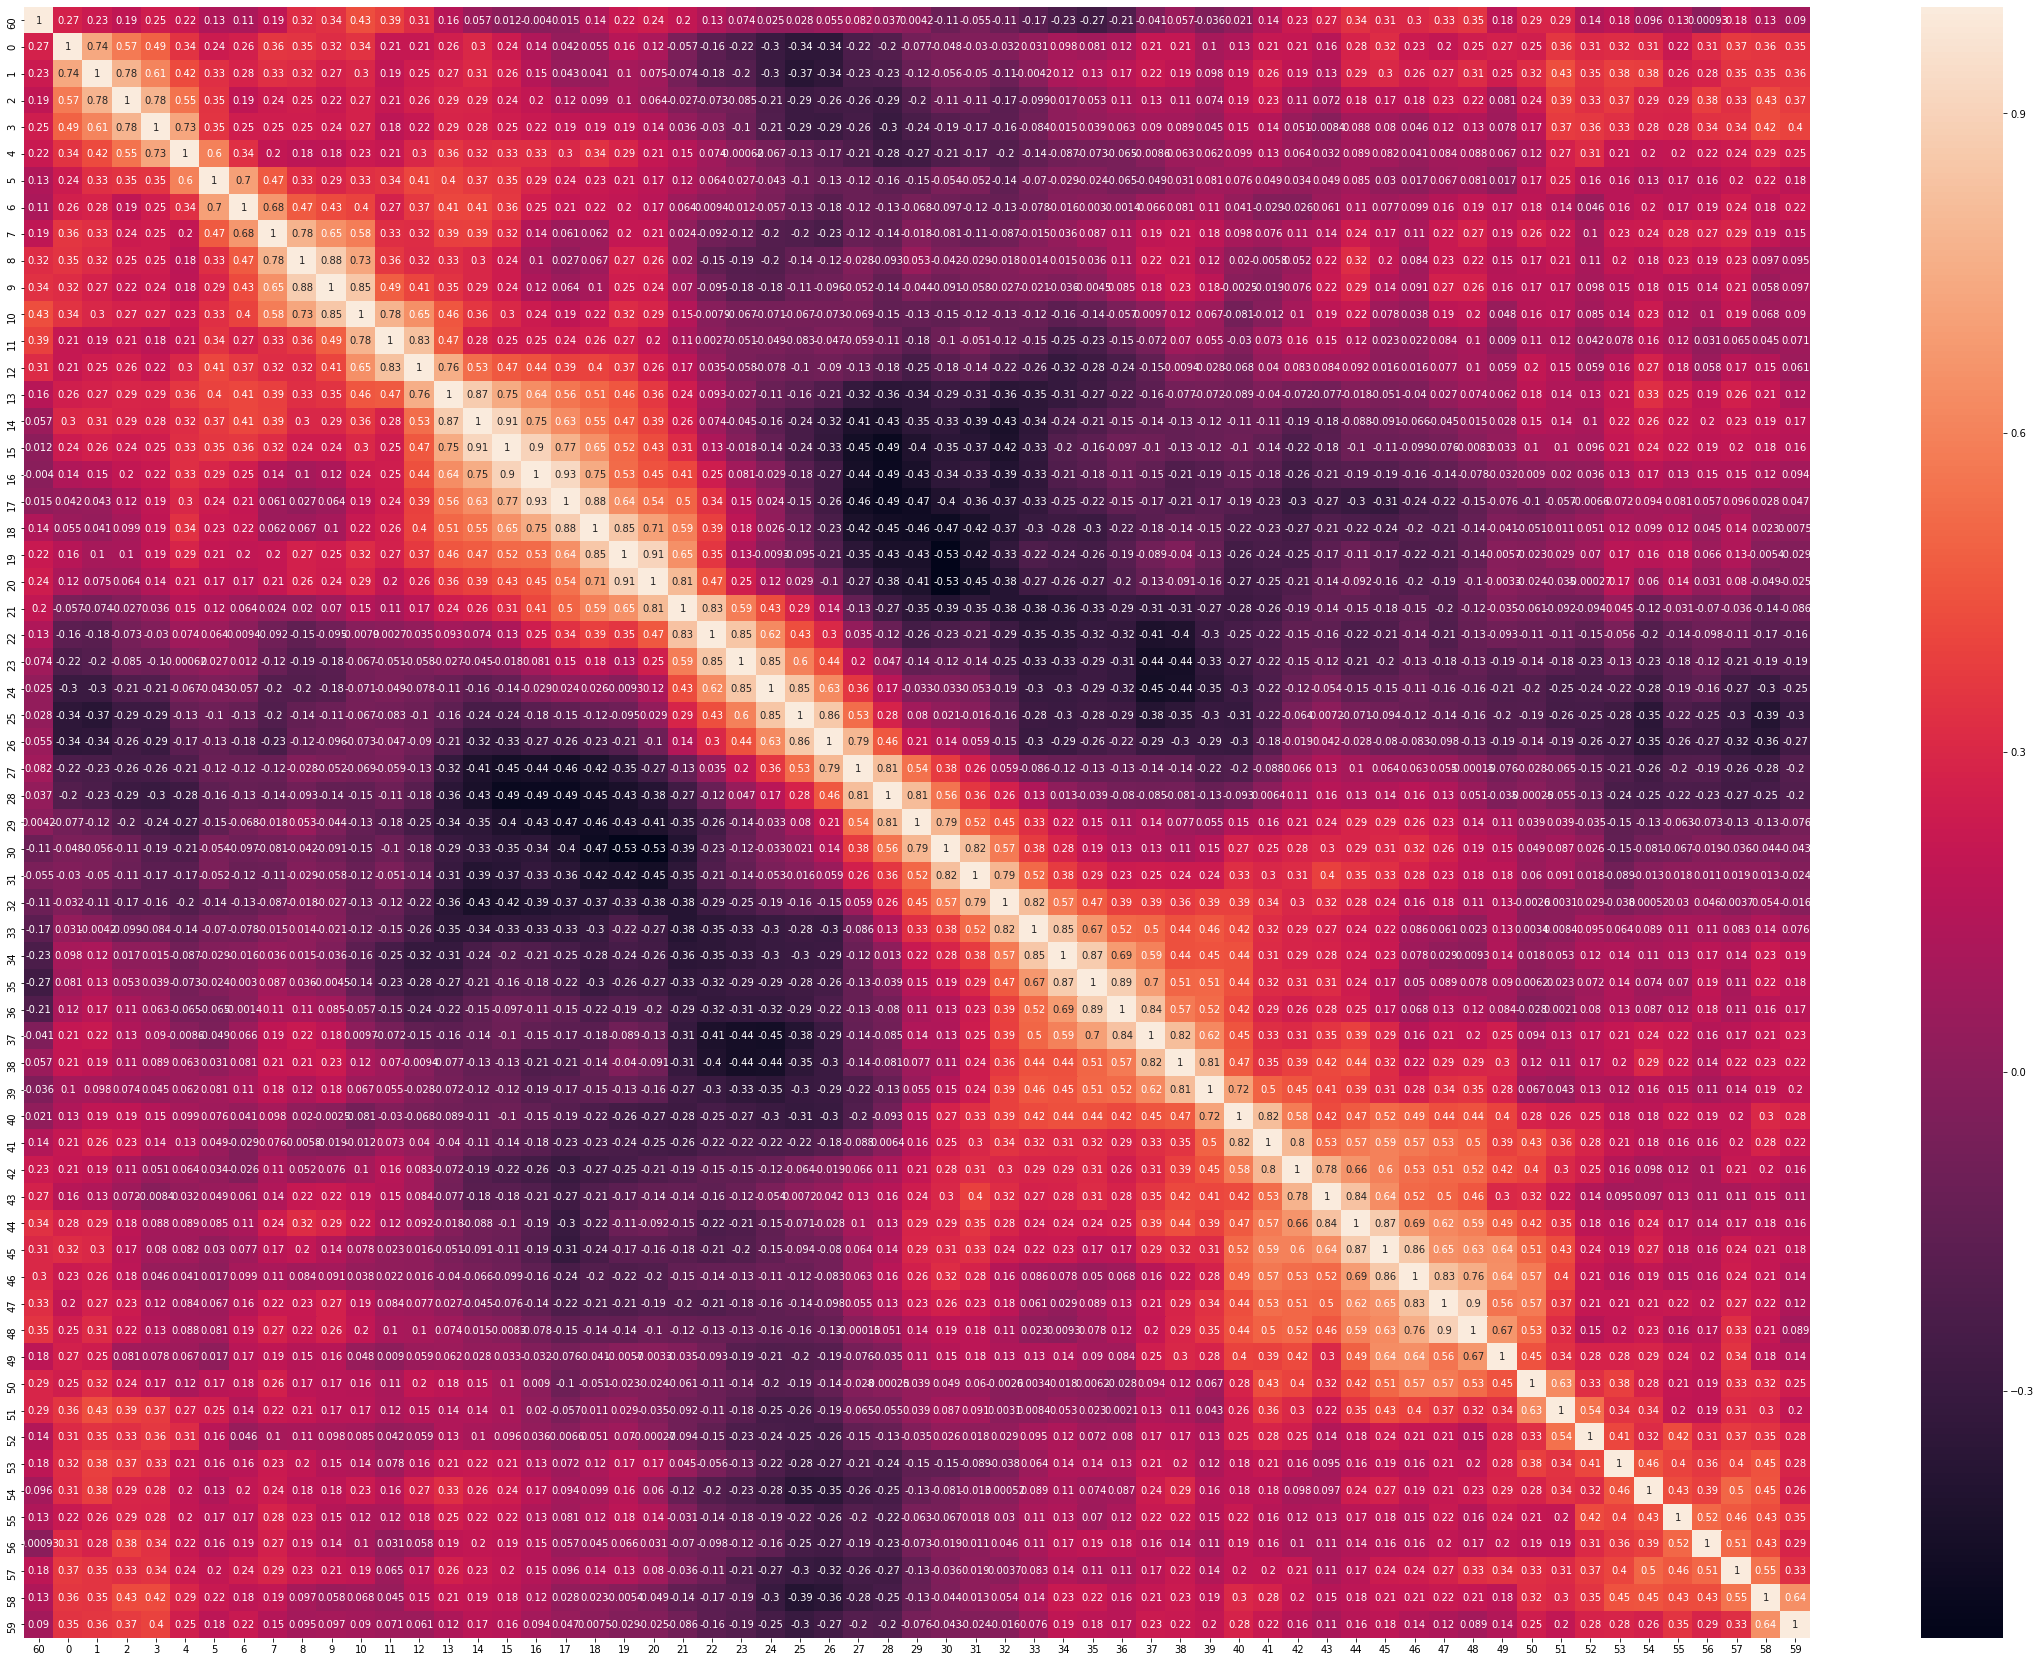

In [14]:
correlation_matrix=df.corr()
fig,ax = plt.subplots(figsize=(40,30))   #change the size of the heatmap
sns.heatmap(correlation_matrix,annot=True)
plt.show

---
## 3.Prepare Data
---

In [15]:
from sklearn.model_selection import train_test_split 
  
x_train, x_test, y_train, y_test = train_test_split(x, target, test_size = 0.2, random_state = 7)

In [16]:
from sklearn.preprocessing import StandardScaler
x_train_sc=StandardScaler().fit_transform(x_train)
x_test_sc=StandardScaler().fit_transform(x_test)
x_train_sc.shape
x_test_sc.shape

(42, 60)

In [17]:
y_test.shape

(42,)

---
## 4.Implement PCA 
---

In [18]:
from sklearn.decomposition import PCA
pca = PCA(.95)   #Let PCA keep 95% of the information of the features, how many components need to be kept
x_train_pca = pca.fit_transform(x_train_sc) 
x_test_pca = pca.transform(x_test_sc) 
pca.n_components_

29

In [19]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.20197892 0.18466365 0.083363   0.06039894 0.04881136 0.04151004
 0.03520486 0.0295793  0.02618284 0.02366448 0.02158986 0.0204764
 0.01665016 0.01498605 0.01466273 0.01439249 0.01324392 0.01288409
 0.01126408 0.01018869 0.00989353 0.00881873 0.00819112 0.00800308
 0.00755804 0.00628912 0.00606573 0.00551531 0.0052412 ]


---
## 5.Fit models
---

### SVM 

In [20]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import time

#### Cross Validation

In [21]:
#kfold = KFold(n_splits=3, random_state=7)
kfold = KFold(n_splits=3, random_state=7)
svc=SVC(gamma='scale')
result = cross_val_score(svc, x_train_pca, y_train, cv=kfold, scoring='accuracy')
print(result.mean())

0.8010822510822511


#### Grid Seach for Parameter tuning

In [22]:
parameter={'kernel':('linear','rbf'),'C':[1,10]}
grid1=GridSearchCV(svc,parameter,cv=6, n_jobs=-1,  scoring='accuracy')

start_time = time.time()
model1 = grid1.fit(x_train_pca, y_train)

print("Best: %f using %s" % (model1.best_score_, model1.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.861446 using {'C': 10, 'kernel': 'rbf'}
Execution time: 3.099189043045044 ms


In [23]:
prediction1 =  model1 .predict(x_test_pca)
accuracy1=accuracy_score(y_test, prediction1)
print('Accuracy of SVM is:', accuracy1)

Accuracy of SVM is: 0.9047619047619048


In [24]:
f1_score1=f1_score(y_test,prediction1,average='binary')
print('F1_score of SVM is:', f1_score1)

F1_score of SVM is: 0.923076923076923


### Logistic Regression

#### Cross Validation

In [25]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l2')
lr=lr.fit(x_train_pca, y_train)
result = cross_val_score(lr, x_train_pca, y_train, cv=kfold, scoring='accuracy')
print(result.mean())

0.8190476190476191


#### Grid Seach for Parameter tuning

In [26]:
dual=[True,False]
max_iter=[100,110,120,130,140]
C = [1.0,1.5,2.0,2.5]
param_grid = dict(dual=dual,max_iter=max_iter,C=C)
grid2 = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 6, n_jobs=-1,  scoring='accuracy')

start_time = time.time()
model2 = grid2.fit(x_train_pca, y_train)

print("Best: %f using %s" % (model2.best_score_, model2.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.789157 using {'C': 1.0, 'dual': True, 'max_iter': 100}
Execution time: 0.9411640167236328 ms


In [27]:
prediction2 =  lr.predict(x_test_pca)
accuracy2=accuracy_score(y_test, prediction2)
print('Accuracy of Logistic Regression is:', accuracy2)

Accuracy of Logistic Regression is: 0.7380952380952381


In [28]:
f1_score2=f1_score(y_test,prediction2,average='binary')
print('F1_score of Logistic Regression is:', f1_score2)

F1_score of Logistic Regression is: 0.7924528301886792


### Decision Tree

#### Cross Validation

In [90]:
from sklearn import tree
clf_tree=tree.DecisionTreeClassifier()
result = cross_val_score(clf_tree, x_train_pca, y_train, cv=kfold, scoring='accuracy')
print(result.mean())

0.7832251082251083


#### Grid Seach for Parameter tuning

In [91]:
parameters={'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2)}
grid3=GridSearchCV(clf_tree,parameters,cv = 5, n_jobs=-1,  scoring='accuracy')

start_time = time.time()
model3 = grid3.fit(x_train_pca, y_train)

print("Best: %f using %s" % (model3.best_score_, model3.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.789157 using {'max_depth': 3, 'min_samples_split': 70}
Execution time: 1.447674036026001 ms


In [92]:
prediction3 =  model3 .predict(x_test_pca)
accuracy3= accuracy_score(y_test, prediction3)
print('Accuracy of Decision Tree is:', accuracy3)

Accuracy of Decision Tree is: 0.6428571428571429


In [93]:
f1_score3= f1_score(y_test,prediction3,average='binary')
print('F1_score of Decision Tree is:', f1_score3)

F1_score of Decision Tree is: 0.6666666666666667


### Random Forest

#### Cross Validation

In [100]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=7)
result = cross_val_score(rfc, x_train, y_train, cv=kfold, scoring='accuracy')
print(result.mean())

0.7888528138528139


#### Grid Seach for Parameter tuning

In [97]:
param_grid = { 
    'n_estimators': [20, 50],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
grid4 = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 6, n_jobs=-1,  scoring='accuracy')

start_time = time.time()
model4 = grid4.fit(x_train, y_train)

print("Best: %f using %s" % (model4.best_score_, model4.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')


Best: 0.861446 using {'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 20}
Execution time: 8.238081932067871 ms


In [98]:
prediction4 =  model4 .predict(x_test)
accuracy4= accuracy_score(y_test, prediction4)
print('Accuracy of Random Forest is:', accuracy4)

Accuracy of Random Forest is: 0.8809523809523809


In [99]:
f1_score4= f1_score(y_test,prediction4,average='binary')
print('F1_score of Random Forest is:', f1_score4)

F1_score of Random Forest is: 0.9019607843137256


### KNN

#### Cross Validation

In [107]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
result = cross_val_score(knn, x_train_pca, y_train, cv=kfold, scoring='accuracy')
print(result.mean())

0.7832251082251083


#### Grid Seach for Parameter tuning

In [108]:
param_grid = { 'n_neighbors':[3,5,7,9,11],
              'weights':['uniform','distance'],
              'metric':['euclidean','manhattan']
             }
grid5 = GridSearchCV(estimator=knn, param_grid=param_grid, cv= 6, n_jobs=-1,  scoring='accuracy')
start_time = time.time()
model5 = grid5.fit(x_train_pca, y_train)

print("Best: %f using %s" % (model5.best_score_, model5.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')


Best: 0.831325 using {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Execution time: 0.2569549083709717 ms


In [109]:
prediction5 =  model5 .predict(x_test_pca)
accuracy5= accuracy_score(y_test, prediction5)
print('Accuracy of KNN is:', accuracy5)

Accuracy of KNN is: 0.8095238095238095


In [106]:
f1_score5= f1_score(y_test,prediction5,average='binary')
print('F1_score of KNN is:', f1_score5)

F1_score of KNN is: 0.7916666666666667


### Naive Bayes

In [113]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
result = cross_val_score(gnb, x_train_pca, y_train, cv=kfold, scoring='accuracy')
print(result.mean())


0.7646103896103895


In [114]:
model6=gnb.fit(x_train_pca, y_train)
prediction6 =  model6 .predict(x_test_pca)
accuracy6= accuracy_score(y_test, prediction6)
print('Accuracy of Naive Bayes is:', accuracy6)

Accuracy of Naive Bayes is: 0.7142857142857143


### Neural Network

In [43]:
num_digits=2
y_train_nn = keras.utils.to_categorical(y_train, num_digits)
y_test_nn = keras.utils.to_categorical(y_test, num_digits)

In [44]:
np.random.seed(121)
n_input=60
n_hidden_1=20
n_hidden_2=20
Inp = Input(shape=(60,))
x1 = Dense(n_hidden_1, activation='relu', name = "Hidden_Layer_1")(Inp)
Dropout(.3)(x1)   
x2 = Dense(n_hidden_2, activation='relu', name = "Hidden_Layer_2")(x1)
Dropout(.3)(x2)
output = Dense(num_digits, activation='sigmoid', name = "Output_Layer")(x2)


In [45]:
model=Model(Inp, output)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 60)                0         
_________________________________________________________________
Hidden_Layer_1 (Dense)       (None, 20)                1220      
_________________________________________________________________
Hidden_Layer_2 (Dense)       (None, 20)                420       
_________________________________________________________________
Output_Layer (Dense)         (None, 2)                 42        
Total params: 1,682
Trainable params: 1,682
Non-trainable params: 0
_________________________________________________________________


In [46]:
learning_rate=.001
training_epochs=30
batch_size=20
adam=keras.optimizers.Adam(lr=learning_rate)
#rms = optimizers.RMSprop(lr=learning_rate)

In [47]:
model.compile(loss='categorical_crossentropy',
              optimizer= 'adam',
              metrics=['accuracy'])

In [48]:
history = model.fit(x_train_sc, y_train_nn,
                     batch_size = batch_size,
                     epochs = training_epochs,
                     verbose = 1,   
                     validation_data=(x_test_sc, y_test_nn))

Train on 166 samples, validate on 42 samples
Epoch 1/30
166/166 [==============================] - 0s 1ms/step - loss: 0.6982 - accuracy: 0.5361 - val_loss: 0.7089 - val_accuracy: 0.5952
Epoch 2/30
166/166 [==============================] - 0s 184us/step - loss: 0.6567 - accuracy: 0.5843 - val_loss: 0.6783 - val_accuracy: 0.6429
Epoch 3/30
166/166 [==============================] - 0s 156us/step - loss: 0.6205 - accuracy: 0.6386 - val_loss: 0.6551 - val_accuracy: 0.6429
Epoch 4/30
166/166 [==============================] - 0s 147us/step - loss: 0.5917 - accuracy: 0.6747 - val_loss: 0.6322 - val_accuracy: 0.6905
Epoch 5/30
166/166 [==============================] - 0s 145us/step - loss: 0.5623 - accuracy: 0.7169 - val_loss: 0.6126 - val_accuracy: 0.6905
Epoch 6/30
166/166 [==============================] - 0s 141us/step - loss: 0.5345 - accuracy: 0.7410 - val_loss: 0.5942 - val_accuracy: 0.7143
Epoch 7/30
166/166 [==============================] - 0s 163us/step - loss: 0.5039 - accuracy

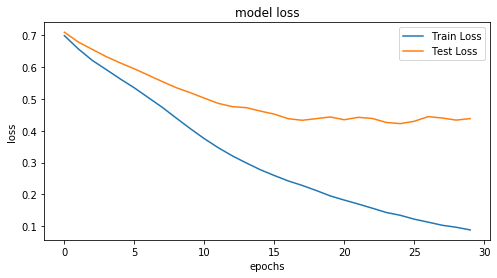

In [49]:
import matplotlib.pyplot as plt 
%matplotlib inline
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show()

---
## 6.Ensembling
---

#### Voting Ensemble for Classification:#### 

Since KNN, and SVM have the best performence, we'll ensemble those two models for optimization.

In [119]:
from sklearn.ensemble import VotingClassifier

model7 = VotingClassifier(estimators=[('svm', model1),('knn', model5)], voting='hard')
results = cross_val_score(model7, x_train_pca, y_train, cv=kfold)
print(results.mean())

0.8431818181818183


In [120]:
model7.fit(x_train_pca,y_train)
prediction7 =  model7.predict(x_test_pca)
accuracy7= accuracy_score(y_test, prediction7)
print('Accuracy of the Voting Ensemled model is:', accuracy7)

Accuracy of the Voting Ensemled model is: 0.8571428571428571


In [121]:
f1_score7= f1_score(y_test,prediction7,average='binary')
print('F1_score of the Voting Ensemled model is:', f1_score7)

F1_score of the Voting Ensemled model is: 0.8800000000000001


#### Bagged Decision Trees for Classification

In [73]:
from sklearn.ensemble import BaggingClassifier

cart=tree.DecisionTreeClassifier()
num_trees=100
model8=BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=7)
results = cross_val_score(model8, x_train, y_train, cv=kfold)
print(results.mean())

0.7650432900432902


In [74]:
model8.fit(x_train,y_train)
prediction8 =  model8.predict(x_test)
accuracy8= accuracy_score(y_test, prediction8)
print('Accuracy of the Bagged Decision Tree is:', accuracy8)

Accuracy of the Bagged Decision Tree is: 0.9285714285714286


Bagged DT performs well on the original dataset without standerdization and PCA.

#### AdaBoost Classification

In [55]:
from sklearn.ensemble import AdaBoostClassifier
num_trees = 70

model9 = AdaBoostClassifier(n_estimators=num_trees, random_state=7)
results = cross_val_score(model9, x_train, y_train, cv=kfold)
print(results.mean())

0.7891774891774892


In [56]:
model9.fit(x_train,y_train)
prediction9 =  model9.predict(x_test)
accuracy9= accuracy_score(y_test, prediction9)
print('Accuracy of the Bagged Decision Tree is:', accuracy9)

Accuracy of the Bagged Decision Tree is: 0.7619047619047619


---
## 7.Summarize
---

The accuracy of Decision Tree and Random Forest is lower after standadaization, but other algorithms have a better accuracy because most of them depends on calculating the distance for similarity.

Bagged Decision Tree has the best performance.

Now we use other different metrics to evaluate it.

In [122]:
f1_score8=f1_score(y_test,prediction8,average='binary')
print('F1_score of Bagged Decision Tree is:', f1_score8)

F1_score of Bagged Decision Tree is: 0.9411764705882353


In [79]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,prediction8)
cm

array([[15,  0],
       [ 3, 24]])

[Text(0, 0.5, 'R'), Text(0, 1.5, 'M')]

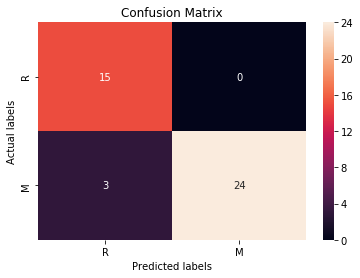

In [80]:
ax= plt.subplot()
sns.heatmap(cm,annot=True, ax = ax)


ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['R','M'])
ax.yaxis.set_ticklabels(['R','M'])

In [84]:
from sklearn.metrics import roc_auc_score

auc= roc_auc_score(y_test,prediction8)
print('AUC score for Bagged Decision Tree is:', auc)

AUC score for Bagged Decision Tree is: 0.9444444444444444


---
## 8.Predict and Save Model
---

In [124]:
prediction8[:5]

array([0, 1, 1, 1, 1])

In [125]:
import pickle
pickle.dump(model8,open('model.pkl','wb'))

In [126]:
model0=pickle.load(open('model.pkl','rb'))
print(model0.predict(x_test))

[0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 0 1 1
 0 0 1 1 0]
